## Roger Federer in Tennis 

#### Part 1: Using linear regression and statsmodels to find which surface type predicts the most points for Federer in the [tennis.csv](https://www.kaggle.com/m1thr4nd1r/tennis) dataset.

In [11]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import mixture
import statsmodels.api as sm 
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
%matplotlib inline

In [2]:
Tennis = pd.read_csv("../A/tennis.csv")
Tennis.head()

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True
3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0,False
4,1998,"Geneva, Switzerland",1998-08-24,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [3]:
Tennis = Tennis.dropna()
Tennisdf = Tennis.copy()
Tennisdf.rename(columns={"player1 total points won": "Federer Points"}, inplace=True)
Tennisdf["Federer Points"]
col = np.array(Tennisdf["Federer Points"], np.int16)
Tennisdf["Federer Points"] = col
Federer_Points = Tennisdf["Federer Points"]
Federer_Points.dropna()

0        41
1        65
2        79
3        60
5        63
       ... 
1173     96
1174    130
1175     55
1176     60
1177     92
Name: Federer Points, Length: 1016, dtype: int16

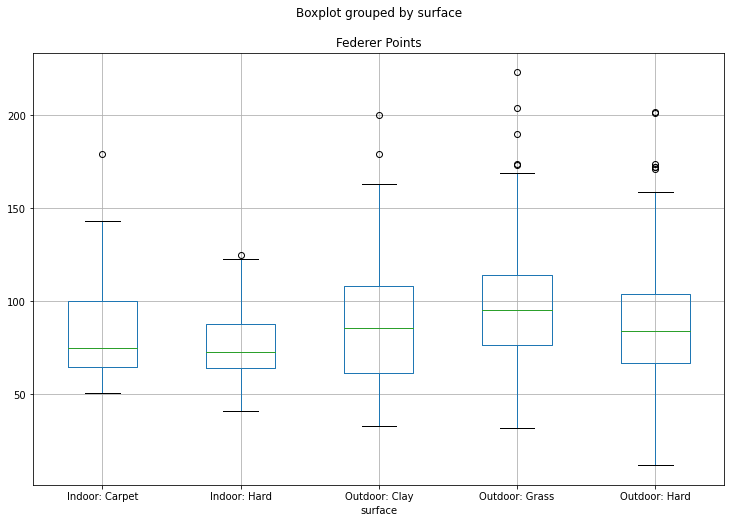

In [5]:
df = Tennisdf[["Federer Points", "surface"]]
k = len(pd.unique(df.surface))
N = len(df.values)
n = df.groupby("surface").size()[0]
df.boxplot("Federer Points", by="surface", figsize=(12,8))
surface = df["Federer Points"][df.surface.values == "surface"]
courts = pd.unique(df.surface.values)

In [6]:
X = (pd.get_dummies(Tennisdf["surface"], drop_first=True))
y = Federer_Points
X

,Indoor: Hard,Outdoor: Clay,Outdoor: Grass,Outdoor: Hard
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
5,0,1,0,0
...,...,...,...,...
1173,0,0,0,1
1174,0,0,0,1
1175,0,0,0,1
1176,0,0,0,1


In [7]:
est = sm.OLS(Federer_Points, sm.add_constant(X)).fit(cov_type="HC2")
est.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Federer Points   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     16.93
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           1.91e-13
Time:                        14:24:25   Log-Likelihood:                -4793.2
No. Observations:                1016   AIC:                             9596.
Df Residuals:                    1011   BIC:                             9621.
Df Model:                           4                                         
Covariance Type:                  HC2                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             83.2281      3.411     24.403      0.000      76.543      89.913
Indoor: Hard      -6.1456      3.629     -1.693      0.090     -13.259       0.968
Outdoor: Clay      4.8599      3.990      1.218      0.223      -2.961      12.680
Outdoor: Grass    15.4655      4.524      3.419      0.001       6.599      24.332
Outdoor: Hard      4.5908      3.659      1.255      0.210      -2.581      11.762
==============================================================================
Omnibus:                      141.907   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.211
Skew:                           0.915   Prob(JB):                     3.77e-51
Kurtosis:                       4.463   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [8]:
r = np.zeros_like(est.params)
r[2:4] =[1,-1]
T_test = est.t_test(r)
print(T_test)

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0           -10.6056      3.622     -2.928      0.003     -17.706      -3.506


In [9]:
stats.ttest_ind(X['Outdoor: Grass'], X['Outdoor: Clay'], equal_var=False)

Ttest_indResult(statistic=-5.50572855439636, pvalue=4.166176446636886e-08)

In [10]:
B = X["Indoor: Hard"]
C = X["Outdoor: Clay"]
D = X["Outdoor: Grass"]
E = X["Outdoor: Hard"]
fvalue, pvalue = stats.f_oneway( B, C, D, E)
print(f"The fvalue and pvalue are {fvalue} and {pvalue} respectfully")

The fvalue and pvalue are 98.22206389251893 and 2.251124502939191e-61 respectfully


The coefficient for each independent variable reflects both the strength and type of relationship the independent variable has to the dependent variable. When the sign associated with the coefficient is negative, the relationship is negative and when positive, the relationship is positive. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

For Federer's performances on the Indoor Hard surface, there is a negative coefficient indicating a negative relationship between his total points won and the points gotten on the indoor hard surface. Using the traditional definition for the regression constant in considering Federer's performance on the indoor hard surface, Federer's performance on the indoor hard is 614% lower than his performance on the Indoor Carpet (dropped column).

For Federer's performances on the Outdoor clay surface, there is a positive coefficient indicating a positive relationship between his total points won and the points gotten on the outdoor clay surface. Federer's performance is 485% higher compared to his performance on the Indoor Carpet.

For Federer's performances on the Outdoor grass surface, there is a positive coefficient indicating a positive relationship(and the highest) between his total points won and the points gotten on the outdoor grass surface. Federer's performance is 1546% higher compared to his performance on the Indoor Carpet.

The Outdoor Hard surfaces also favour him a lot more than the indoor carpet surface, increasing his total points won by 459% per game played.

The truly R-squared score makes the analysis of the surfaces Federer has played on a poor marker for his win percentage.

The p-value for the matches on the Indoor Hard courts is not statistically significant because this p-value(0.090) is greater than the usual significance level of 0.05. As such, the games here have no effect on the overall points. However, since the p-values for the other surfaces are actually very small (not exactly 0), the test hypotheses for these surfaces can be rejected. Likewise, the T test is used to assess whether or not an explanatory variable is statistically significant



#### Part 2: Using linear regression and statsmodels to examine Federer's scores against his opponents in the [tennis.csv](https://www.kaggle.com/m1thr4nd1r/tennis) dataset.

In [13]:
Federer_Points = Tennisdf["Federer Points"]
Opponents_Points = Tennisdf["player2 total points won"]
model = LinearRegression()
X= Federer_Points
y = Opponents_Points
result = sm.OLS(y,X).fit(cov_type="HC2")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player2 total points won   R-squared (uncentered):                   0.969
Model:                                  OLS   Adj. R-squared (uncentered):              0.969
Method:                       Least Squares   F-statistic:                          2.929e+04
Date:                      Sat, 15 Jan 2022   Prob (F-statistic):                        0.00
Time:                              14:41:16   Log-Likelihood:                         -4126.1
No. Observations:                      1016   AIC:                                      8254.
Df Residuals:                          1015   BIC:                                      8259.
Df Model:                                 1                                                  
Covariance Type:                        HC2                                                  
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Federer Points     0.8608      0.005    171.143      0.000       0.851       0.871
==============================================================================
Omnibus:                       69.375   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.649
Skew:                           0.697   Prob(JB):                     1.13e-18
Kurtosis:                       3.099   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC2)
"""

In [14]:
print(result.params)
print(result.tvalues)

Federer Points    0.860802
dtype: float64
Federer Points    171.142945
dtype: float64


In [15]:
stats.ttest_ind(X,y)

Ttest_indResult(statistic=10.142736499527302, pvalue=1.2909773137512344e-23)

##### _Why no Constant Term?_

In the simplest term, this regression model does not have a constant term because the constant term assumes an opponent is on a negative score at the start of every match, this makes the analysis irregular as a tennis game cannot record negative points.

As seen above, there is a linear relationship between Federer's performance vs his opponents. Hence, the coefficient indicates that for every point he gained, the opponent had 0.86. Furthermore, a low p-value suggests that the slope is not zero, which in turn indicates that changes in the predictor variable are associated with direct changes in the response variable.